#### Start of by importing all the necessary python *libraries* we need for this question and the *class* **NaturalCubicSpline** creating a natural cubic spline basis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV, ElasticNetCV, ElasticNet

In [2]:
class NaturalCubicSpline():
    def __init__(self, df):
        self.df = df
   
    def nat_cubic_spl_basis(self, X, knots):
        n = len(X)
        K = len(knots)
        TPB = np.array([np.maximum((X - knot)**3, 0) for knot in knots]).T
        D = np.zeros([n, K - 1])
        for k in range(K - 1):
            D[:, k] = (TPB[:, k] - TPB[:, -1])/(knots[-1] - knots[k])
        N = np.zeros([n, K])
        N[:, 0] = 1
        N[:, 1] = X
        for k in range(K - 2):
            N[:, k + 2] = D[:, k] - D[:, -1]
        return N

#### The file loaded using **Pandas Library** is in a text file as **txt** so we need to make use of the paramter *delimiter* since is a tab separated file

In [6]:
df = pd.read_csv("acemoglu_johnson_robinson.txt", delimiter="\t")

#### Printed the first 5 lines of the dataframe df to make sure the **acemoglu_johnson_robinson.txt** was read properly.

In [15]:
print(df.head())

    GDP  Exprop    Mort  Latitude  Neo  Africa  Asia  Namer  Samer
0  8.39    6.50   78.20    0.3111    0       1     0      0      0
1  7.77    5.36  280.00    0.1367    0       1     0      0      0
2  9.13    6.39   68.90    0.3778    0       0     0      0      1
3  9.90    9.32    8.55    0.3000    1       0     0      0      0
4  9.29    7.50   85.00    0.2683    0       0     0      1      0


#### Created a variable called **continuous_variable** which contains a list of all continuous variables, which will be used to graph a scatter plot using the **Seaborn Library** 

In [19]:
continuous_variable = df.select_dtypes(include=[np.float64]).columns.tolist()
continuous_variable

['GDP', 'Exprop', 'Mort', 'Latitude']

#### Used a for loop to loop through the list **continuous_variable** and an if statement to exclude **GDP** from the *x values* therefore making it only a *y value*

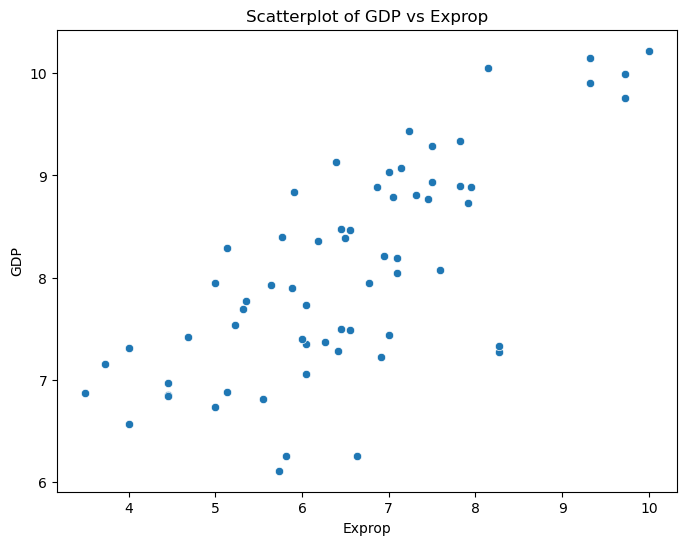

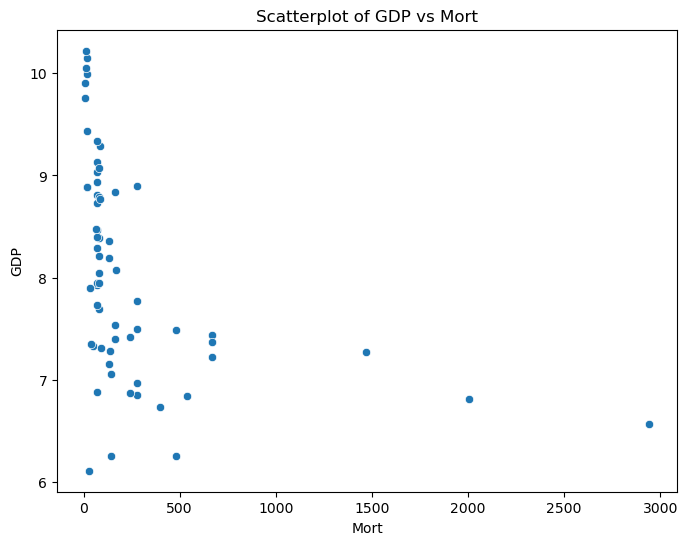

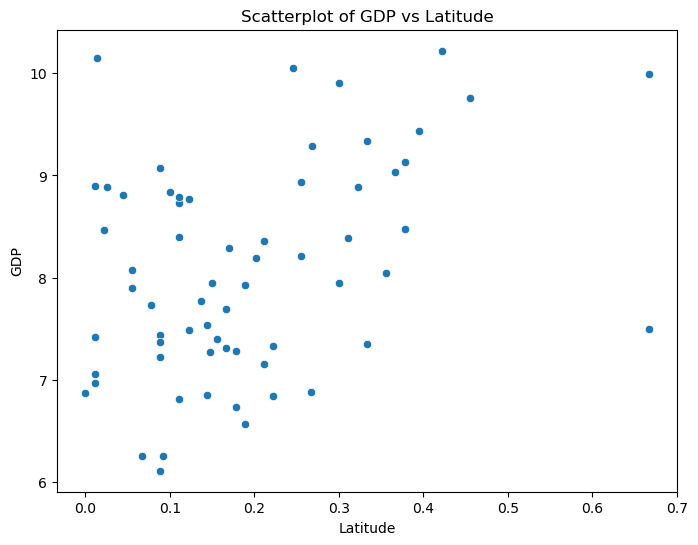

In [22]:
for variable  in continuous_variable:
    if variable != "GDP":
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[variable], y=df["GDP"])
        plt.xlabel(variable)
        plt.ylabel('GDP')
        plt.title(f"Scatterplot of GDP vs {variable}")

#### Used **.describe()** to show a descriptive table of the dataframe 

In [33]:
print(df.describe())

             GDP     Exprop         Mort   Latitude        Neo     Africa  \
count  64.000000  64.000000    64.000000  64.000000  64.000000  64.000000   
mean    8.062500   6.516094   245.911094   0.190483   0.062500   0.421875   
std     1.043701   1.468841   472.623943   0.145075   0.243975   0.497763   
min     6.110000   3.500000     8.550000   0.000000   0.000000   0.000000   
25%     7.302500   5.617500    68.900000   0.088900   0.000000   0.000000   
50%     7.950000   6.475000    78.150000   0.161150   0.000000   0.000000   
75%     8.852500   7.352500   240.000000   0.267100   0.000000   1.000000   
max    10.220000  10.000000  2940.000000   0.666700   1.000000   1.000000   

            Asia      Namer      Samer  
count  64.000000  64.000000  64.000000  
mean    0.140625   0.218750   0.171875  
std     0.350382   0.416667   0.380254  
min     0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000  
50%     0.000000   0.000000   0.000000  
75%     0.000000   

#### Standardisation of all the variables expect the variable named **GDP** which was centered by subtracting it own mean from it. Used **StandardScaler** from the **Scikit-learn Library** to standardised the other variables. Placed the standardised variables and the centered **GDP** into a copy of the dataframe and named it as **df_1**. Then used **df_1** as the new dataframe for the machine learning algorithm.

In [37]:
df_1 = df.copy()
scaler = StandardScaler()

In [41]:
df_1["GDP"] = df["GDP"] - df["GDP"].mean()
df_1[continuous_variable[1:]] = scaler.fit_transform(df[continuous_variable[1:]]) #Use the continuous variable and sliced it to get the all the variables apart from GDP

In [43]:
print(df_1.head())

      GDP    Exprop      Mort  Latitude  Neo  Africa  Asia  Namer  Samer
0  0.3275 -0.011043 -0.357656  0.837985    0       1     0      0      0
1 -0.2925 -0.793301  0.072697 -0.373655    0       1     0      0      0
2  1.0675 -0.086524 -0.377489  1.301381    0       0     0      0      1
3  1.8375  1.924015 -0.506190  0.760868    1       0     0      0      0
4  1.2275  0.675147 -0.343155  0.540633    0       0     0      1      0


#### Created a natural cubic spline basis using the *class* **NaturalCubicSpline** , with *df* as 20 and the **Latitude** variable. Made use of the **NumPy Library** to create an even spaced from minimum to maximum of the **Latitude** variable using **np.linspace**. Check the shape using **.shape** to make sure is **Nx20**, the used slicing to discard the first column then check the shape again to make sure is now **Nx19**

In [47]:
latitude_values = df_1["Latitude"].values
knots = np.linspace(latitude_values.min(), latitude_values.max(), 20) #20 evenly space numbers
spline = NaturalCubicSpline(20)
natural_cubic_splines = spline.nat_cubic_spl_basis(latitude_values, knots)

In [49]:
natural_cubic_splines.shape #Check the shape before discarding the first column

(64, 20)

In [51]:
natural_cubic_splines = natural_cubic_splines[:,1:]
natural_cubic_splines.shape #Check the shape after discarding the first column

(64, 19)

#### Firstly, created a dataframe that contains only natural cubic spline basis of Latitude using list comprehension and naming each columns Latitude_spl_1, ..., Latitude_spl_19. Then used **.drop()** to drop the columns **GDP** and **Latitude**, after that used **.join()** to add natural cubic spline basis of Latitude and named that dataframe as **df_X**. Then added a constant variable **1.0** to the dataframe, then name the dataframe as **X** this was done by using **.add_constant** from the python package **statsmodels.api**. This help as to write the  linear model in vector form as an inner product. 

In [54]:
nat_spline_df = pd.DataFrame(natural_cubic_splines, columns=[f'Latitude_spl_{i}' for i in range(1, 20)])

In [62]:
print(nat_spline_df)

    Latitude_spl_1  Latitude_spl_2  Latitude_spl_3  Latitude_spl_4  \
0         0.837985        2.179834        1.606873        1.131494   
1        -0.373655        0.184939        0.080172        0.023818   
2         1.301381        3.903996        3.076004        2.355463   
3         0.760868        1.954732        1.420699        0.982195   
4         0.540633        1.398252        0.969279        0.629245   
..             ...             ...             ...             ...   
59        1.224264        3.569901        2.786695        2.109574   
60        1.609849        5.448515        4.433120        3.529669   
61       -0.705744        0.050866        0.011907        0.000531   
62       -0.088114        0.406929        0.222112        0.100860   
63       -1.323374        0.000000        0.000000        0.000000   

    Latitude_spl_5  Latitude_spl_6  Latitude_spl_7  Latitude_spl_8  \
0         0.749710        0.456465        0.245264        0.107609   
1         0.002670 

In [64]:
df_X = df_1.drop(columns=["GDP", "Latitude"]).join(nat_spline_df)
X = sm.add_constant(df_X)

In [68]:
print(X)

    const    Exprop      Mort  Neo  Africa  Asia  Namer  Samer  \
0     1.0 -0.011043 -0.357656    0       1     0      0      0   
1     1.0 -0.793301  0.072697    0       1     0      0      0   
2     1.0 -0.086524 -0.377489    0       0     0      0      1   
3     1.0  1.924015 -0.506190    1       0     0      0      0   
4     1.0  0.675147 -0.343155    0       0     0      1      0   
..    ...       ...       ...  ...     ...   ...    ...    ...   
59    1.0  0.332052 -0.373011    0       0     0      0      1   
60    1.0  2.390625 -0.492435    1       0     0      1      0   
61    1.0  0.428119 -0.357869    0       0     0      0      1   
62    1.0 -0.072801 -0.225863    0       0     1      0      0   
63    1.0 -2.069616 -0.012606    0       1     0      0      0   

    Latitude_spl_1  Latitude_spl_2  ...  Latitude_spl_10  Latitude_spl_11  \
0         0.837985        2.179834  ...         0.003508         0.000000   
1        -0.373655        0.184939  ...         0.000

In [70]:
List_variables = X.select_dtypes(include=[np.number]).columns.tolist()
List_variables #the list contains are variable but note that we added a constant variable to it so it made columns 27 instead of 26

['const',
 'Exprop',
 'Mort',
 'Neo',
 'Africa',
 'Asia',
 'Namer',
 'Samer',
 'Latitude_spl_1',
 'Latitude_spl_2',
 'Latitude_spl_3',
 'Latitude_spl_4',
 'Latitude_spl_5',
 'Latitude_spl_6',
 'Latitude_spl_7',
 'Latitude_spl_8',
 'Latitude_spl_9',
 'Latitude_spl_10',
 'Latitude_spl_11',
 'Latitude_spl_12',
 'Latitude_spl_13',
 'Latitude_spl_14',
 'Latitude_spl_15',
 'Latitude_spl_16',
 'Latitude_spl_17',
 'Latitude_spl_18',
 'Latitude_spl_19']

#### Fitted an OLS using **statsmodels.api** package **.fit()**. Printed out the coefficients on each variables together with their names using **.summary()** from the **statsmodels.api** package. Also gave the merits and limitations for using Ordinary Least Square Regression

In [73]:
y = df_1['GDP']
OLS_estimate = sm.OLS(y, X).fit()

In [75]:
print(OLS_estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     8.995
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           1.25e-09
Time:                        17:28:49   Log-Likelihood:                -36.647
No. Observations:                  64   AIC:                             119.3
Df Residuals:                      41   BIC:                             168.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5863      5.390     

#### Merits of using OLS:
1.Very simple to learn and implement and straightforward to understand as well  
2.Coefficient are easy to interpret, by showing a very clear understanding of relationship between variabeles   
3.Can be used with a variety of linear regression models, including simple and multiple regression  
4.Computationally efficient, particularly for big datasets, and techniques like as QR decomposition enhance numerical stability.  
5.OLS regression coefficients can be considered as a weighted average of observed data points, offering insight into the regression process.  

#### Limitations of using OLS:  
1.When the independent variables are highly correlated, OLS can yield incorrect regression coefficient estimates.  
2.Highly overfitted due to the model being too complex and having a lots of predictors
3.Highly sensitive to outliers, making it vulnerable to extreme data points, which can drastically distort the regression line and result in biased estimations.  
4.Not suited for handling categorical variables in this case we have some categorical variables  
5.Can lead to biased standard errors and incorrect inferences due to some assumptions beig voilated.  

A suitable estimator to use to adddress this limitation can be ridge regression since it tackles multicolinearity, also better for continuous predictors. In our case not all of the predictors were continuous. Another suitable estimate to use will be Least Absolute Shrinkage and Selection Operator(LASSSO) but it will completely exclude some predictors. However after this consideration, seeing that we have both collinearity and potential irrelevant  features, Elastice Net is the best balance.

To use the Elastic Net regression, import from **Scikit Learn Library** use **ElasticNetCV** to get the best alpha value and l1_ratio value. 
This gave me the best suitable for the alpha and l1_ratio parameters. Fitted the Elastic Net Regression using **ElasticNet** imported from **Scikit Learn Library**. Printed out the intercept and the coefficients on each variable.

In [81]:
en = ElasticNetCV(cv=5, random_state=42, max_iter=100000000) #increased the max_iter from the default to increase the number of iterations.
en.fit(X,y)

ElasticNetCV(cv=5, max_iter=100000000, random_state=42)

In [83]:
alpha = en.alpha_ # The right alpha to use for for fitting the regressions which is the constant that multiplies the penalty terms
l1_ratio = en.l1_ratio_ #The ElasticNet mixing parameter

In [85]:
regr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=100000000)
regr.fit(X, y)

ElasticNet(alpha=0.003059379487139137, max_iter=100000000)

In [89]:
elasticnet_coefficients = pd.DataFrame({'Variable': X.columns, 'ElasticNet Coefficient': regr.coef_})
print(f"Intercpet: {regr.intercept_}")
print(elasticnet_coefficients)

Intercpet: -0.19910980604761436
           Variable  ElasticNet Coefficient
0             const                0.000000
1            Exprop                0.545591
2              Mort               -0.074158
3               Neo               -0.089300
4            Africa               -0.757541
5              Asia               -0.484103
6             Namer                0.187662
7             Samer                0.056801
8    Latitude_spl_1               -0.510765
9    Latitude_spl_2                0.740023
10   Latitude_spl_3                0.000000
11   Latitude_spl_4               -0.000000
12   Latitude_spl_5               -0.110067
13   Latitude_spl_6               -0.438067
14   Latitude_spl_7               -0.458295
15   Latitude_spl_8               -0.212473
16   Latitude_spl_9               -0.000000
17  Latitude_spl_10                0.000000
18  Latitude_spl_11                0.000000
19  Latitude_spl_12                0.059589
20  Latitude_spl_13                0.218888


The coefficients of the variables are smaller compared to the OLS coefficients of the name variables. Which shows how the overfitting has been corrected, by reducing overfitting by regularizing coefficients.It has also handles multicollinearity effectively by combining Ridge and LASSO. Works well with high-dimensional datasets where feature selection is needed and also oerforms feature selection while retaining correlated predictors.